In [34]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model from Scikit-Learn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#Model Evaluations
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [36]:

df=pd.read_csv('kidney_disease.csv')

In [38]:
#df.isna().sum()

# Make list of Catagoricaldata and Numerical data.

In [ ]:
NumericalColumns = ['age','bp','al','su','bgr','bu','sc','sod','pot','hemo']
CategoricalColumns = ['rbc','sg','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']

In [40]:
#
df['classification'].replace(["ckd\t","ckd\t\t"],["ckd","ckd"],inplace=True)

df['dm'].replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)

df['cad'].replace(["\tno"],["no"],inplace=True)


df['rc'].replace("\t?",np.nan, inplace=True)

df.wc.replace("\t?",np.nan, inplace=True)

df['pcv'].replace(["\t?","\t43"],np.nan, inplace=True)


for columnName in CategoricalColumns:
  df[columnName].fillna(df[columnName].mode()[0], inplace=True)

for columnName in NumericalColumns:
  df[columnName].fillna(df[columnName].mean(), inplace=True)

In [23]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [24]:
encodeColumn = ['rbc','pc' ,'pcc' ,'ba' ,'htn' ,'dm' ,'cad' ,'appet' ,'pe' ,'ane']
df = pd.get_dummies(df , columns=encodeColumn , prefix=encodeColumn , drop_first=True)

In [25]:
df['classification'].replace(["ckd","notckd"],[1,0], inplace=True)

In [26]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,1,1,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,1,1,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,1,1,0,0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,1,0,1,0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,1,1,0,0,0,0,0,0,0,0


In [27]:
df.classification.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [28]:
#suffle dataset in dataframe df
df = df.sample(frac = 1).reset_index()

X=df.drop('classification',axis=1)
Y=df['classification']
min_max = MinMaxScaler()
min_max.fit(X)
X = min_max.transform(X)

In [29]:
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.40)

In [30]:
#Put Models in a dictonary

models={
    "Logistics Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machines": svm.LinearSVC(),
}


def fit_and_score(models,x_train,x_test,y_train,y_test):
    model_scores={}
    
    np.random.seed(42)
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
        model_scores[name+" Train "]=model.score(x_train,y_train)
        
    return model_scores
        

In [31]:
model_scores=fit_and_score(
    models=models,
    x_train=X_train,
    x_test=X_test,
    y_train=Y_train,
    y_test=Y_test)
model_scores

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

{'Logistics Regression': 0.99375,
 'Logistics Regression Train ': 1.0,
 'KNN': 0.99375,
 'KNN Train ': 1.0,
 'Random Forest': 1.0,
 'Random Forest Train ': 1.0,
 'Support Vector Machines': 0.99375,
 'Support Vector Machines Train ': 1.0}

<AxesSubplot:>

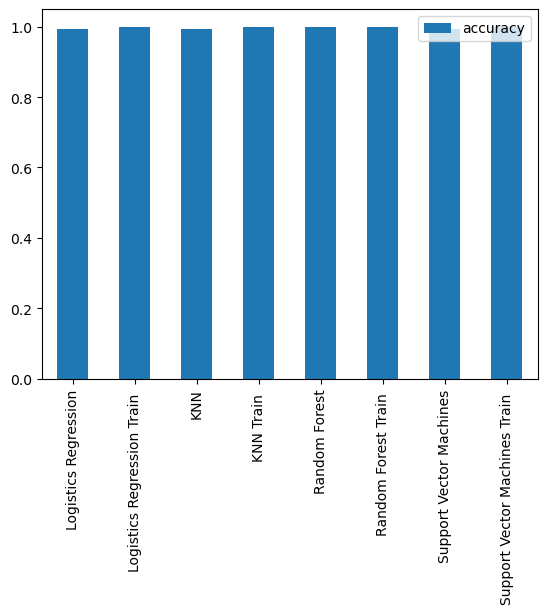

In [32]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

In [33]:

# let's tune KNN

train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()
for i in  neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    
    test=knn.score(X_test,Y_test)
    train=knn.score(X_train,Y_train)
    train_scores.append(train)
    test_scores.append(test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Maximum KNN score on the test data: 99.38%


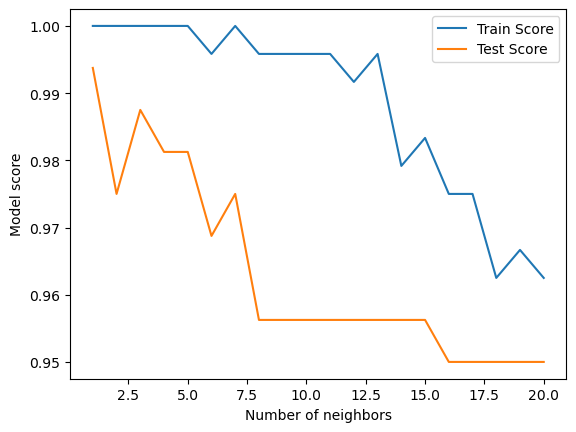

In [17]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")